# Customer
Grouping customers in various ways to understand their behavior and preferences.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from common_functions import get_engine, read_data_return_df, drop_sk_datetime_added_columns as drop_columns, \
    plot_unique_clusters, plot_intra_inter_silhouette, plot_cluster_scatter
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.decomposition import PCA

## Connecting to the Database

In [2]:
engine = get_engine()

Connection to UnitedOutdoors database successful


## Reading in the Data

In [3]:
query = "SELECT * FROM Customer"
customers = read_data_return_df(query, engine)

customers

,CUSTOMER_sk,CUSTOMER_CUSTOMER_CustomerID,CUSTOMER_CUSTOMER_PersonID,CUSTOMER_CUSTOMER_StoreID,CUSTOMER_CUSTOMER_TerritoryID,CUSTOMER_CUSTOMER_AccountNumber,CUSTOMER_STORE_Name,CUSTOMER_STORE_SalesPersonID,CUSTOMER_STORE_Demographics,CUSTOMER_SALESTERRITORY_Name,...,CUSTOMER_CUSTOMERS_City,CUSTOMER_CUSTOMERS_Region,CUSTOMER_CUSTOMERS_PostalCode,CUSTOMER_CUSTOMERS_Country,CUSTOMER_CUSTOMERS_Phone,CUSTOMER_CUSTOMERS_Fax,CUSTOMER_CUSTOMER_Fname,CUSTOMER_CUSTOMER_Lname,CUSTOMER_CUSTOMER_State,CUSTOMER_datetime_added
0,1,1,None,934,144,AW00000001,A Bike Store,280,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",Northwest,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:16.820
1,2,2,None,1028,144,AW00000002,Progressive Sports,283,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",Northwest,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:16.820
2,3,3,None,642,136,AW00000003,Advanced Bike Components,277,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",Southwest,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:16.820
3,4,4,None,932,136,AW00000004,Modular Cycle Systems,277,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",Southwest,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:16.820
4,5,5,None,1026,136,AW00000005,Metropolitan Sports Supply,281,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",Southwest,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:16.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1332,30114,1985,1986,134,AW00030114,Recreation Toy Store,290,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",France,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:22.313
1332,1333,30115,1987,1988,118,AW00030115,Retreat Inn,282,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",Canada,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:22.313
1333,1334,30116,1989,1990,136,AW00030116,Technical Parts Manufacturing,281,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",Southwest,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:22.313
1334,1335,30117,1991,1992,136,AW00030117,Totes & Baskets Company,277,"<StoreSurvey xmlns=""http://schemas.microsoft.c...",Southwest,...,None,None,None,None,None,None,None,None,None,2024-05-26 17:15:22.313


In [4]:
query = "SELECT * FROM BusinessEntity"
business_entity = read_data_return_df(query, engine)

business_entity.head()

,BUSINESSENTITY_sk,BUSINESSENTITY_BUSINESSENTITY_BusinessEntityID,BUSINESSENTITY_BUSINESSENTITYCONTACT_PersonID,BUSINESSENTITY_CONTACTTYPE_ContactTypeID,BUSINESSENTITY_CONTACTTYPE_Name,BUSINESSENTITY_datetime_added
0,1,NaN,NaN,1.0,Accounting Manager,2024-05-26 17:14:05.540
1,2,1510.0,1509.0,2.0,Assistant Sales Agent,2024-05-26 17:14:05.540
2,3,1518.0,1517.0,2.0,Assistant Sales Agent,2024-05-26 17:14:05.540
3,4,1522.0,1521.0,2.0,Assistant Sales Agent,2024-05-26 17:14:05.540
4,5,1528.0,1527.0,2.0,Assistant Sales Agent,2024-05-26 17:14:05.540


In [5]:
query = "SELECT * FROM BusinessEntityAddress"
business_entity_address = read_data_return_df(query, engine)

business_entity_address.head()

,BUSINESSENTITYADDRESS_sk,BUSINESSENTITYADDRESS_BUSINESSENTITYADDRESS_BusinessEntityID,BUSINESSENTITYADDRESS_ADDRESSTYPE_AddressTypeID,BUSINESSENTITYADDRESS_ADDRESSTYPE_Name,BUSINESSENTITYADDRESS_ADDRESS_AddressID,BUSINESSENTITYADDRESS_ADDRESS_AddressLine1,BUSINESSENTITYADDRESS_ADDRESS_AddressLine2,BUSINESSENTITYADDRESS_ADDRESS_City,BUSINESSENTITYADDRESS_ADDRESS_POSTALCODE,BUSINESSENTITYADDRESS_ADDRESS_SpatialLocation,BUSINESSENTITYADDRESS_ADDRESS_StateProvinceID,BUSINESSENTITYADDRESS_datetime_added
0,1,NaN,1,Billing,NaN,None,None,None,None,None,NaN,2024-05-26 17:14:49.097
1,2,111.0,2,Home,1.0,1970 Napa Ct.,None,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0c\xae\x8b\xfc(\xbc\xe...,145.0,2024-05-26 17:14:49.097
2,3,858.0,2,Home,2.0,9833 Mt. Dias Blv.,None,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0c\xd6\xfa\x85\x1a\xe6...,145.0,2024-05-26 17:14:49.097
3,4,20787.0,2,Home,3.0,7484 Roundtree Drive,None,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0c\x18\xe3\x04\xc4\xad...,145.0,2024-05-26 17:14:49.097
4,5,827.0,2,Home,4.0,9539 Glenside Dr,None,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0c\x81:\r_\x9f\xdeG@\x...,145.0,2024-05-26 17:14:49.097


In [6]:
query = "SELECT * FROM Territory"
territory = read_data_return_df(query, engine)

territory.head()

,TERRITORY_sk,TERRITORY_REGION_RegionID,TERRITORY_REGION_RegionDescription,TERRITORY_TERRITORIES_TerritoryID,TERRITORY_TERRITORIES_TerritoryDescription,TERRITORY_REGION_Region,TERRITORY_STATE_StateID,TERRITORY_STATE_StateName,TERRITORY_STATE_StateCapital,TERRITORY_STATE_Country,...,TERRITORY_COUNTRYREGION_Name,TERRITORY_STATEPROVINCE_StateProvinceID,TERRITORY_STATEPROVINCE_StateProvinceCode,TERRITORY_STATEPROVINCE_IsOnlyStateProvinceFlag,TERRITORY_STATEPROVINCE_Name,TERRITORY_SALESTAXRATE_SalesTaxRateID,TERRITORY_SALESTAXRATE_TaxType,TERRITORY_SALESTAXRATE_TaxRate,TERRITORY_SALESTAXRATE_Name,TERRITORY_datetime_added
0,1,1.0,Eastern,1581.0,Westboro,None,None,None,None,None,...,None,NaN,None,None,None,NaN,None,NaN,None,2024-05-26 17:14:46.383
1,2,1.0,Eastern,1730.0,Bedford,None,None,None,None,None,...,None,NaN,None,None,None,NaN,None,NaN,None,2024-05-26 17:14:46.383
2,3,1.0,Eastern,1833.0,Georgetow,None,None,None,None,None,...,None,NaN,None,None,None,NaN,None,NaN,None,2024-05-26 17:14:46.383
3,4,1.0,Eastern,2116.0,Boston,None,None,None,None,None,...,None,NaN,None,None,None,NaN,None,NaN,None,2024-05-26 17:14:46.383
4,5,1.0,Eastern,2139.0,Cambridge,None,None,None,None,None,...,None,NaN,None,None,None,NaN,None,NaN,None,2024-05-26 17:14:46.383


## Data Cleaning

In [7]:
# combining the customers and business entity data
combined_df = pd.merge(customers, business_entity, left_on='CUSTOMER_CUSTOMER_CustomerID', right_on='BUSINESSENTITY_BUSINESSENTITY_BusinessEntityID', suffixes=('_customer', '_business_entity')) 

combined_df = pd.merge(combined_df, business_entity_address, left_on='BUSINESSENTITY_sk', right_on='BUSINESSENTITYADDRESS_BUSINESSENTITYADDRESS_BusinessEntityID', suffixes=('', '_business_entity_address'))

combined_df = pd.merge(combined_df, territory, left_on='CUSTOMER_CUSTOMER_TerritoryID', right_on='TERRITORY_sk', suffixes=('', '_territory'))

# dropping the datetime_added and sk columns
drop_columns(combined_df)

In [8]:
# dropping unnecessary columns
columns_to_keep = ['CUSTOMER_CUSTOMER_CustomerID', 'CUSTOMER_CUSTOMER_StoreID', 'CUSTOMER_CUSTOMER_TerritoryID', 'CUSTOMER_STORE_SalesPersonID', 'CUSTOMER_SALESTERRITORY_CountryRegionCode','CUSTOMER_SALESTERRITORY_SalesYTD', 'CUSTOMER_SALESTERRITORY_SalesLastYear', 'BUSINESSENTITY_CONTACTTYPE_ContactTypeID', 'BUSINESSENTITYADDRESS_ADDRESSTYPE_AddressTypeID', 'TERRITORY_TERRITORIES_TerritoryID', 'TERRITORY_STATEPROVINCE_StateProvinceID', 'TERRITORY_STATEPROVINCE_IsOnlyStateProvinceFlag', 'TERRITORY_SALESTAXRATE_SalesTaxRateID', 'BUSINESSENTITYADDRESS_ADDRESS_City', 'BUSINESSENTITYADDRESS_ADDRESS_POSTALCODE']

# converting the string values to integer representations
combined_df['BUSINESSENTITYADDRESS_ADDRESS_City'] = combined_df['BUSINESSENTITYADDRESS_ADDRESS_City'].astype('category').cat.codes
combined_df['BUSINESSENTITYADDRESS_ADDRESS_POSTALCODE'] = combined_df['BUSINESSENTITYADDRESS_ADDRESS_POSTALCODE'].astype('category').cat.codes

combined_df = combined_df[columns_to_keep]

combined_df.head()

,CUSTOMER_CUSTOMER_CustomerID,CUSTOMER_CUSTOMER_StoreID,CUSTOMER_CUSTOMER_TerritoryID,CUSTOMER_STORE_SalesPersonID,CUSTOMER_SALESTERRITORY_CountryRegionCode,CUSTOMER_SALESTERRITORY_SalesYTD,CUSTOMER_SALESTERRITORY_SalesLastYear,BUSINESSENTITY_CONTACTTYPE_ContactTypeID,BUSINESSENTITYADDRESS_ADDRESSTYPE_AddressTypeID,TERRITORY_TERRITORIES_TerritoryID,TERRITORY_STATEPROVINCE_StateProvinceID,TERRITORY_STATEPROVINCE_IsOnlyStateProvinceFlag,TERRITORY_SALESTAXRATE_SalesTaxRateID,BUSINESSENTITYADDRESS_ADDRESS_City,BUSINESSENTITYADDRESS_ADDRESS_POSTALCODE
0,292,496,136,277,136,1.051085e+07,5.366576e+06,11.0,3,4.0,6.0,0,18.0,67,33
1,294,396,136,276,136,1.051085e+07,5.366576e+06,11.0,3,4.0,6.0,0,18.0,126,100
2,296,766,138,279,136,2.538667e+06,3.925071e+06,11.0,3,5.0,15.0,0,20.0,10,61
3,298,1488,118,282,118,6.771829e+06,5.693989e+06,11.0,3,6.0,1.0,0,1.0,62,45
4,300,386,118,278,118,6.771829e+06,5.693989e+06,11.0,3,6.0,1.0,0,1.0,101,14


## Clustering
Using Kmeans

In [9]:
# Define a range of k values to try, from 2 to the number of data points -1 
ks = range(2, combined_df.shape[0])

# Empty list to store the intra- and inter cluster distances
intra_distances = []
inter_distances = []
silhouette_scores = []

for k in ks:
    # Training the KMeans model for this k value
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(combined_df)
    
    # Calculate the intra cluster distance as the sum of the distances of the samples to their closest cluster center. This is done by kmeans.inertia_
    intra_distance = kmeans.inertia_
    intra_distances.append(intra_distance)
    
    # Calculate the inter cluster distance as the mean distance between the cluster centers. this is done by pairwise_distances(kmeans.cluster_centers_)
    cluster_centers = kmeans.cluster_centers_
    inter_distance = np.mean(pairwise_distances(cluster_centers))
    inter_distances.append(inter_distance)
    
    # calculate the silhouette score
    silhouette_scores.append(silhouette_score(combined_df, kmeans.labels_))

# Create a DataFrame with the results
k_df = pd.DataFrame({'k': ks, 'intra_distance': intra_distances, 'inter_distance': inter_distances, 'silhouette_score': silhouette_scores})
k_df

,k,intra_distance,inter_distance,silhouette_score
0,2,4.935856e+14,2.605630e+06,0.631841
1,3,2.969308e+14,3.375477e+06,0.648117
2,4,2.346854e+14,3.133285e+06,0.644781
3,5,3.846661e+13,3.578408e+06,0.855733
4,6,2.342248e+13,3.431145e+06,0.850489
...,...,...,...,...
164,166,2.790000e+02,3.685433e+06,0.056506
165,167,8.000000e+00,3.703087e+06,0.046323
166,168,6.000000e+00,3.698121e+06,0.034740
167,169,4.000000e+00,3.694550e+06,0.023210


### Plotting the intra and inter cluster distances

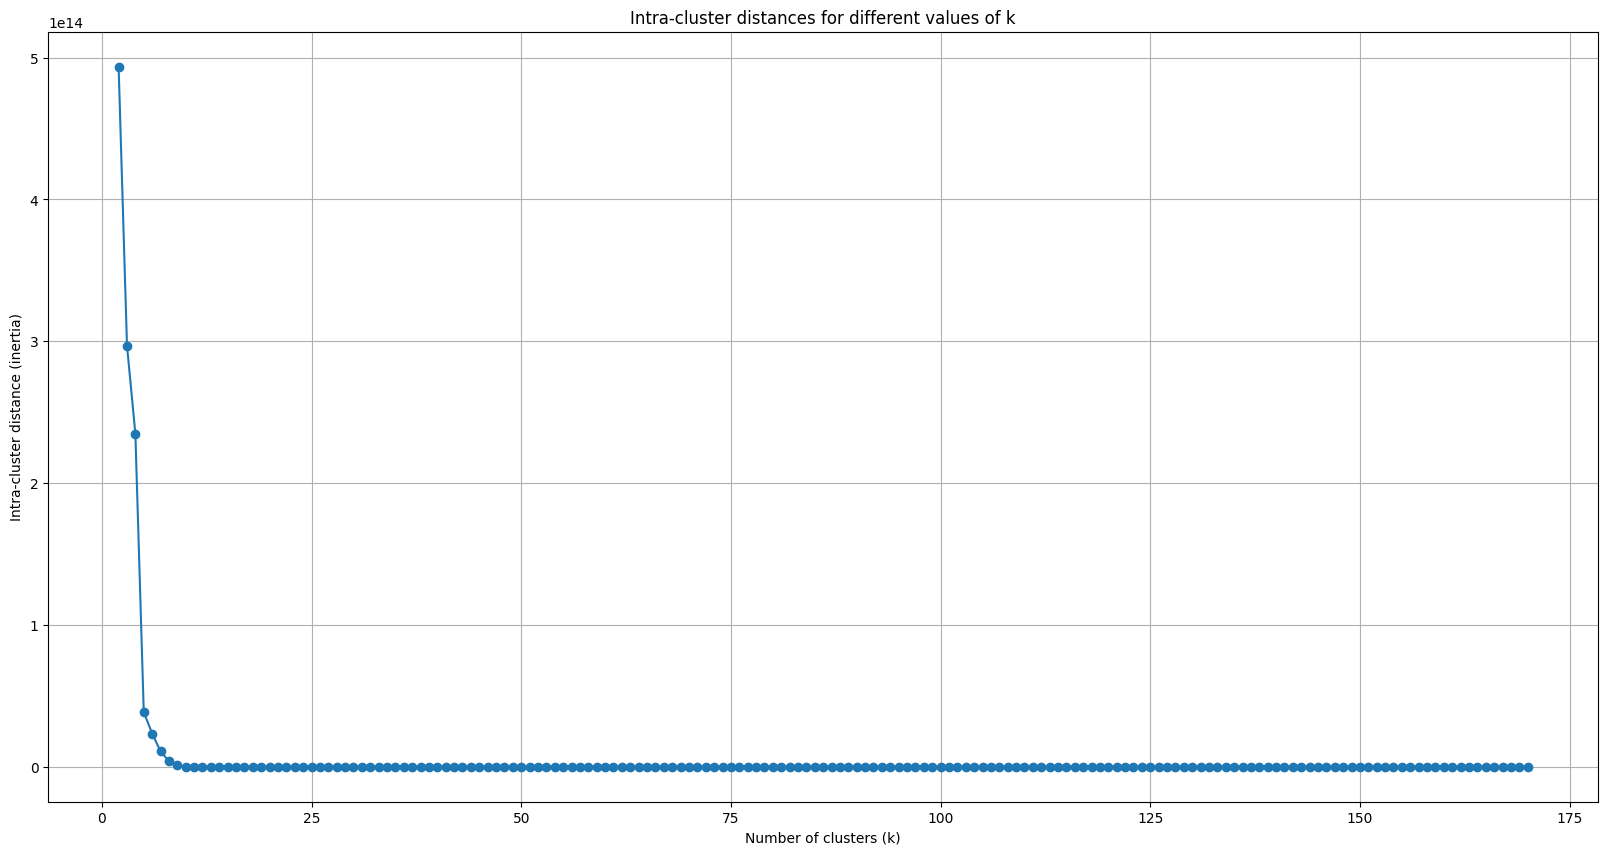

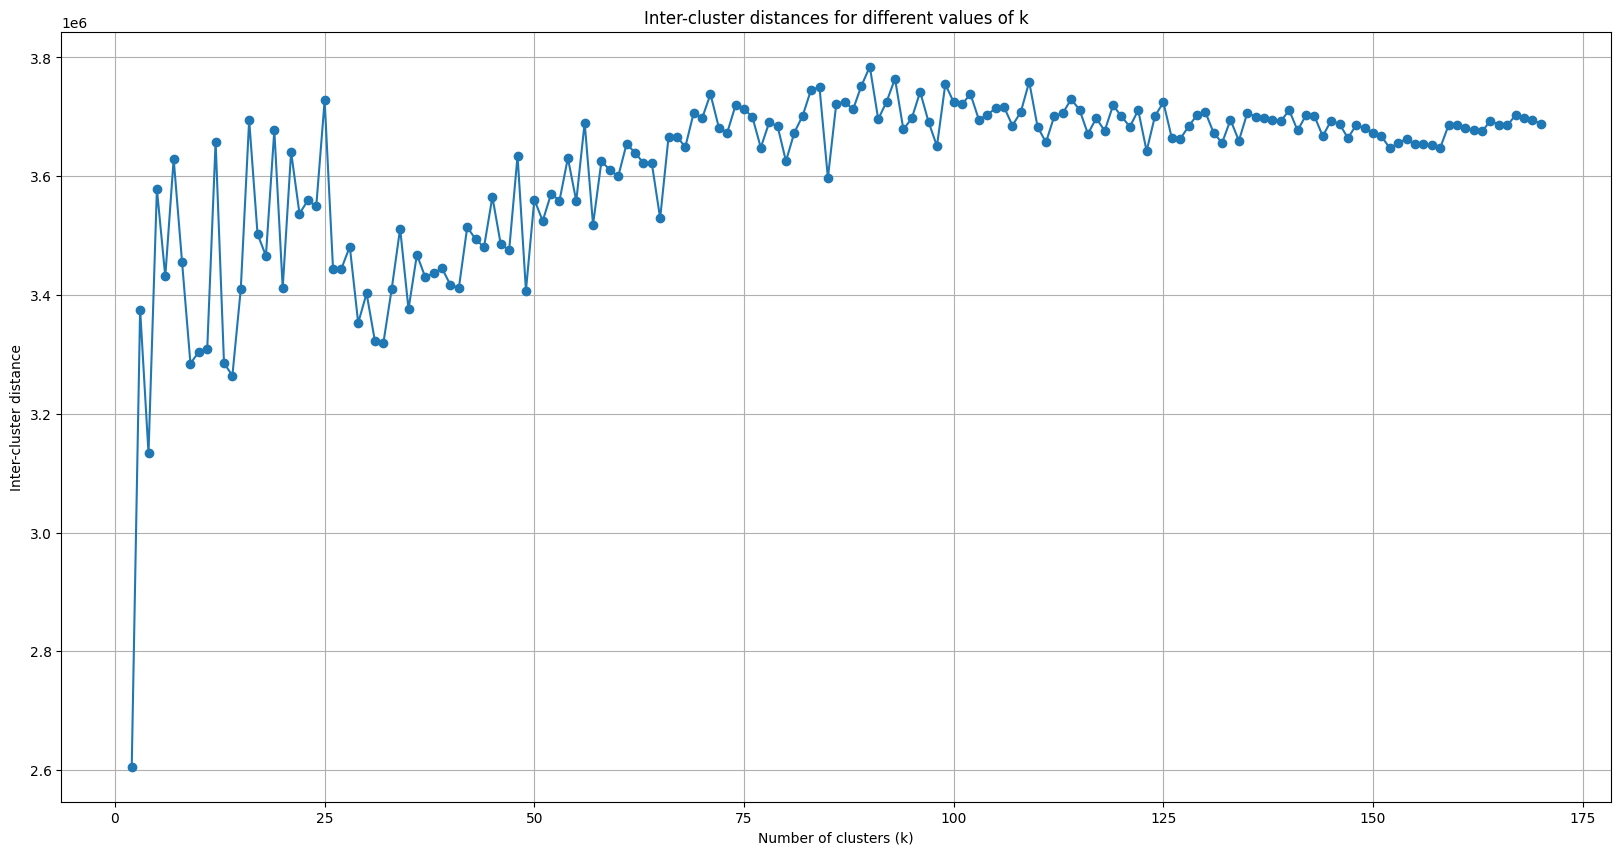

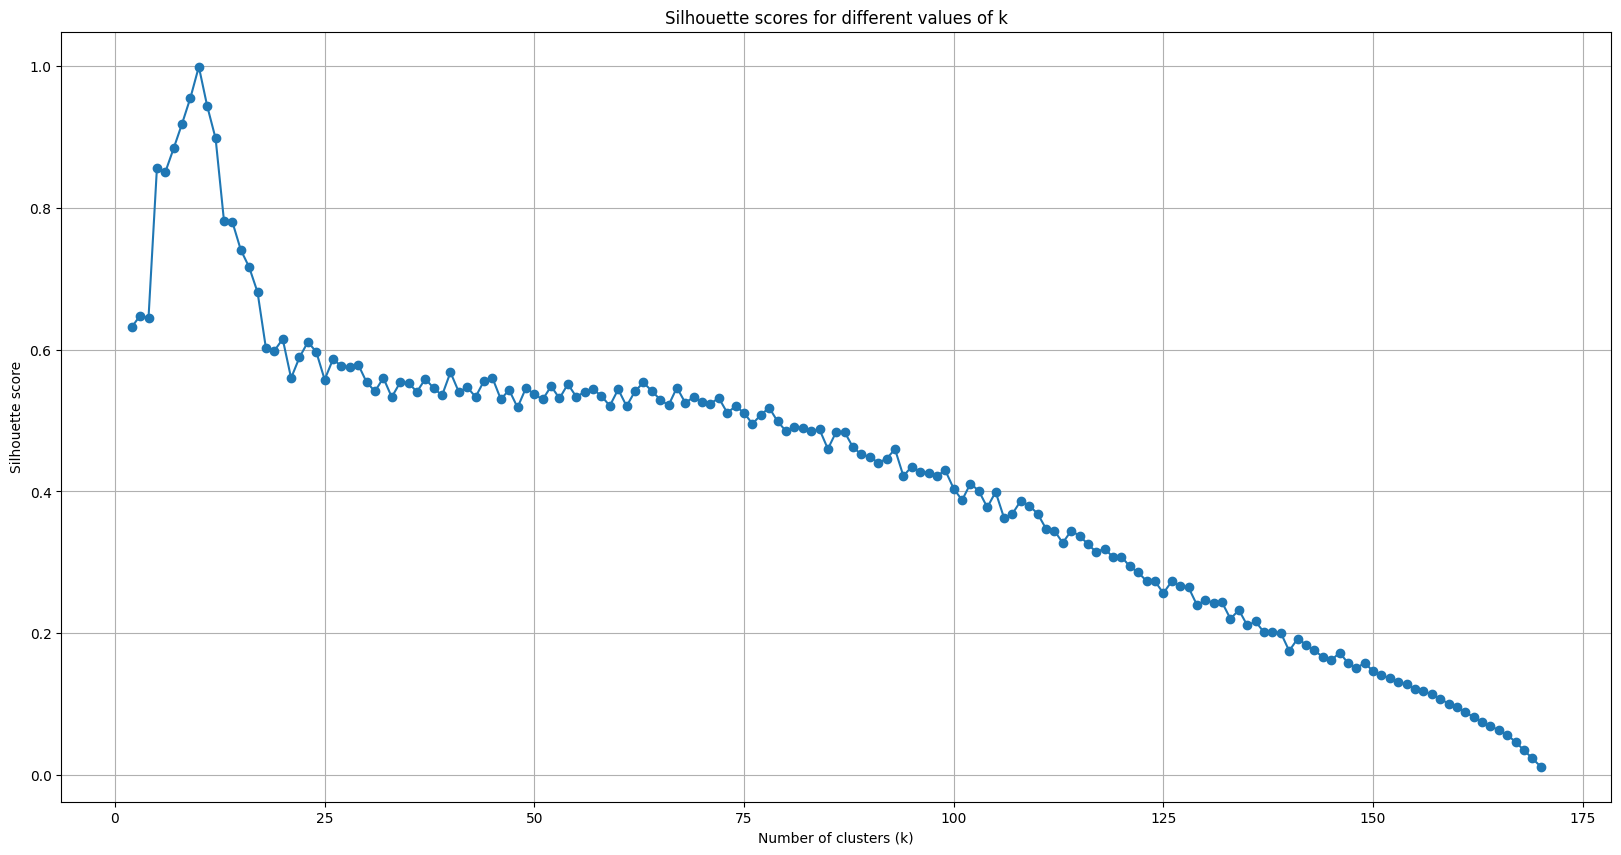

In [10]:
plot_intra_inter_silhouette(ks, intra_distances, inter_distances, silhouette_scores, 'Customer_Cluster')

### Finding the optimal number of clusters

In [11]:
# Gets the index of the maximum silhouette score. Adding 2 because the range of k starts from 2 (since we need at least 2 clusters)
optimal_k = np.argmax(silhouette_scores) + 2

print(f"Optimal number of clusters based on silhouette score: k={optimal_k}")

Optimal number of clusters based on silhouette score: k=10


In [12]:
# Train a KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k)
kmeans_optimal.fit(combined_df)

KMeans(n_clusters=10)

### Plotting the clusters

In [13]:
# Defining a list of colors to be used for the clusters
colors = ['deeppink','blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'azure', 'orange', 'brown']

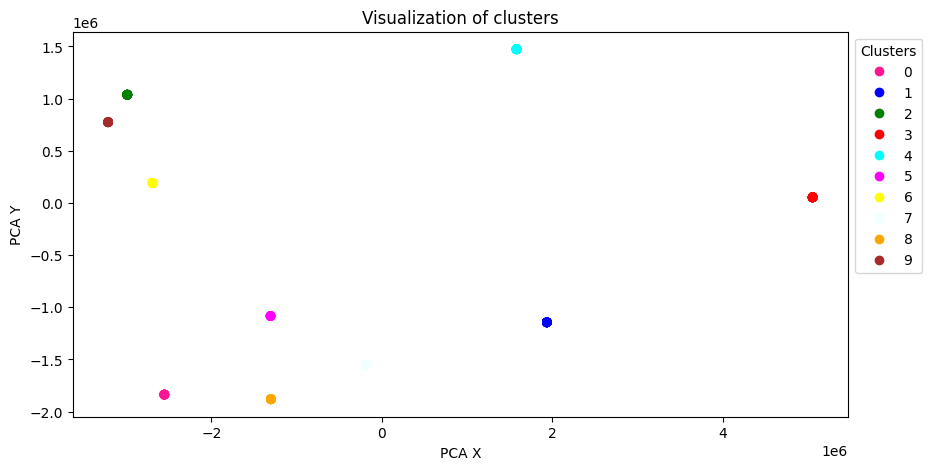

In [14]:
# Get the cluster assignments for each data point
cluster_assignments = kmeans_optimal.labels_

# Reduce the data to two dimensions using PCA
# PCA is a technique that projects the data into a lower dimensional space while preserving as much variance as possible
pca = PCA(n_components=2) # reducing to 2 dimensions
df_pca = pca.fit_transform(combined_df)

# creating a color map using the colors list
color_map = {label: colors[label % len(colors)] for label in np.unique(cluster_assignments)}

# Create a scatter plot of the reduced data, coloring by cluster
plot_cluster_scatter(df_pca, cluster_assignments, color_map, 'Customer_Cluster')

C:\Users\Tjorn\PycharmProjects\United-Outdoors\visualization\static\training\cluster\Customer_Cluster\unique_clusters


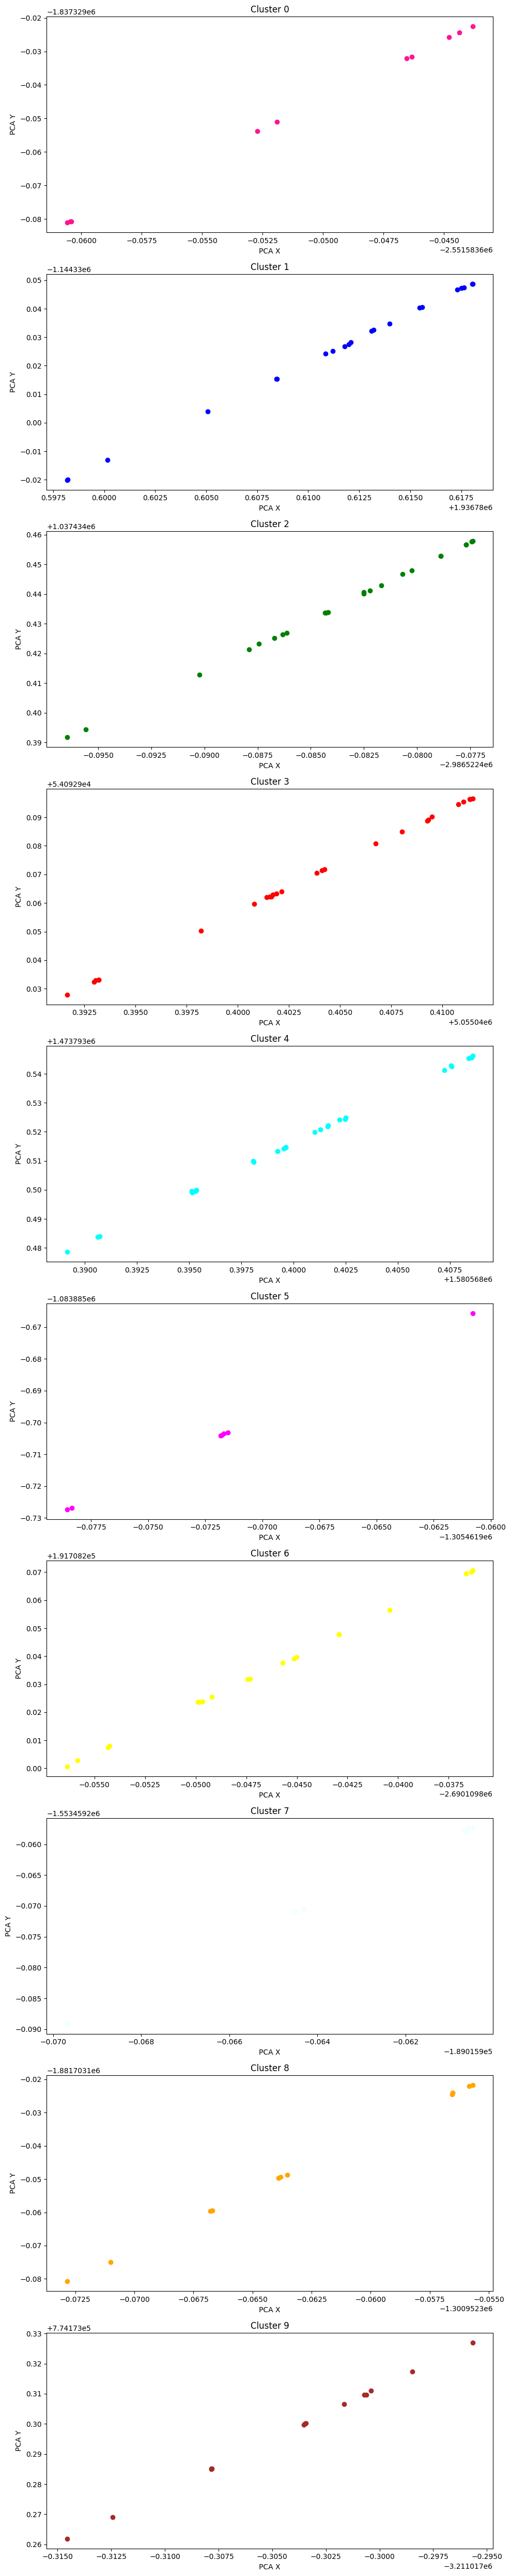

In [15]:
plot_unique_clusters(df_pca, cluster_assignments, colors, 'Customer_Cluster')